<a href="https://colab.research.google.com/github/jaqueantunes/covid_pos/blob/main/pos_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # faça upload do JSON aqui


Saving PNAD_COVID_092020.csv to PNAD_COVID_092020.csv
Saving PNAD_COVID_102020.csv to PNAD_COVID_102020.csv
Saving PNAD_COVID_112020.csv to PNAD_COVID_112020.csv


In [ ]:
#https://ftp.ibge.gov.br/Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_PNAD_COVID19/Microdados/Dados/

In [ ]:
import pandas as pd

# carregar cada mês
df_set = pd.read_csv("PNAD_COVID_092020.csv", sep=",", encoding="latin1")
df_out = pd.read_csv("PNAD_COVID_102020.csv", sep=",", encoding="latin1")
df_nov = pd.read_csv("PNAD_COVID_112020.csv", sep=",", encoding="latin1")

# adicionar coluna de referência de mês
df_set["ref_ym"] = "2020-09"
df_out["ref_ym"] = "2020-10"
df_nov["ref_ym"] = "2020-11"

# unir em um único dataframe
df_all = pd.concat([df_set, df_out, df_nov], ignore_index=True)

print(df_all.shape)
df_all.head()


(1149197, 149)


,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,...,F002A2,F002A3,F002A4,F002A5,F0061,F006,ref_ym,A006A,A006B,A007A
0,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
1,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
2,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
3,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
4,2020,11,11.0,NaN,2,1,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN


In [ ]:
import os

# monta o Google Drive (se ainda não fez)
from google.colab import drive
drive.mount('/content/drive')

# cria a pasta caso não exista
os.makedirs("/content/drive/MyDrive/PNAD_COVID", exist_ok=True)

# agora salva o dataset consolidado
df_all.to_parquet("/content/drive/MyDrive/PNAD_COVID/pnad_covid_3meses.parquet", index=False)

print("✅ Arquivo salvo no Drive!")


MessageError: Error: credential propagation was unsuccessful

In [ ]:
#inicio importação dos dados

In [ ]:
import gdown
import pandas as pd

# ID do arquivo que está dentro da pasta compartilhada
file_id = "1UCA2g0qj-cpkS586xkx7ycyyEvkctkbQ"
url = f"https://drive.google.com/uc?id={file_id}"

output = "pnad_covid_3meses.parquet"

# Baixar
gdown.download(url, output, quiet=False)

# Ler parquet
df = pd.read_parquet(output)
print(df.shape)
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1UCA2g0qj-cpkS586xkx7ycyyEvkctkbQ
To: /content/pnad_covid_3meses.parquet
100%|██████████| 31.3M/31.3M [00:00<00:00, 65.2MB/s]


(1149197, 149)
    Ano  UF  CAPITAL  RM_RIDE  V1008  V1012  V1013  V1016  Estrato        UPA  \
0  2020  11     11.0      NaN      1      4      9      5  1110011  110015970   
1  2020  11     11.0      NaN      1      4      9      5  1110011  110015970   
2  2020  11     11.0      NaN      1      4      9      5  1110011  110015970   
3  2020  11     11.0      NaN      1      4      9      5  1110011  110015970   
4  2020  11     11.0      NaN      2      1      9      5  1110011  110015970   

   ...  F002A2  F002A3  F002A4  F002A5  F0061  F006   ref_ym  A006A  A006B  \
0  ...       1       1       2       1      1   1.0  2020-09    NaN    NaN   
1  ...       1       1       2       1      1   1.0  2020-09    NaN    NaN   
2  ...       1       1       2       1      1   1.0  2020-09    NaN    NaN   
3  ...       1       1       2       1      1   1.0  2020-09    NaN    NaN   
4  ...       1       1       2       1      1   1.0  2020-09    NaN    NaN   

   A007A  
0    NaN  
1    Na

In [ ]:
df.head()

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,...,F002A2,F002A3,F002A4,F002A5,F0061,F006,ref_ym,A006A,A006B,A007A
0,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
1,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
2,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
3,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
4,2020,11,11.0,NaN,2,1,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN


In [ ]:
print(df['RM_RIDE'].unique())

[nan 13. 15. 16. 21. 22. 23. 24. 25. 26. 27. 28. 29. 31. 32. 33. 35. 41.
 42. 43. 51. 52.]


In [ ]:
# Lista simples das colunas
print(df.columns.tolist())

# Lista mais organizada (uma por linha)
for col in df.columns:
    print(col)


['Ano', 'UF', 'CAPITAL', 'RM_RIDE', 'V1008', 'V1012', 'V1013', 'V1016', 'Estrato', 'UPA', 'V1022', 'V1023', 'V1030', 'V1031', 'V1032', 'posest', 'A001', 'A001A', 'A001B1', 'A001B2', 'A001B3', 'A002', 'A003', 'A004', 'A005', 'A006', 'A007', 'A008', 'A009', 'B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110', 'B00111', 'B00112', 'B00113', 'B002', 'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036', 'B0037', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B005', 'B006', 'B007', 'B008', 'B009A', 'B009B', 'B009C', 'B009D', 'B009E', 'B009F', 'B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106', 'B011', 'C001', 'C002', 'C003', 'C004', 'C005', 'C0051', 'C0052', 'C0053', 'C006', 'C007', 'C007A', 'C007B', 'C007C', 'C007D', 'C007E', 'C007E1', 'C007E2', 'C007F', 'C008', 'C009', 'C009A', 'C010', 'C0101', 'C01011', 'C01012', 'C0102', 'C01021', 'C01022', 'C0103', 'C0104', 'C011A', 'C011A1', 'C011A11', 'C011A12', 'C011A2', 'C011A21', 'C011A22', 'C012', 'C0

In [ ]:
# df2 = df.rename(columns={
#     "V2007": "sexo",

#     "V3001": "escolaridade",
#     "C013": "febre",
#     "C014": "tosse",
#     "C015": "dificuldade_respirar",
#     "C016": "dor_cabeca",
#     "C017": "perda_olfato_paladar",
#     "C018": "fadiga",
#     "C019": "dor_muscular",
#     "C020": "dor_peito"
#     # ... seguir com as demais
# })

In [ ]:
#Parte 2

In [ ]:
df2 = df.rename(columns={
    "V1012": "semana",
    "V1013": "mes",
    "RM_RIDE": "regiao",
    "V1008": "numero_domicilio",
    "V1016": "numero_entrevista",
    "B0011": "febre",
    "B0012": "tosse",
    "B0013": "dor_garganta",
    "B0014": "dificuldade_respirar",
    "B0016": "dor_cabeca",
    "B0018": "perda_olfato_paladar",
    "B0019": "dor_peito",
    "B002" : "atendimento",
    # B002 = Por causa disso foi a algum estabelecimento de saúde?
    "B008" : "realizacao_teste_covid",
    "B011": "resultado_teste_covid",
})

In [ ]:
df_clinico = df2[["semana","mes","regiao","numero_domicilio","numero_entrevista","febre","tosse","dor_garganta","dificuldade_respirar","dor_cabeca","perda_olfato_paladar","dor_peito","atendimento","realizacao_teste_covid","resultado_teste_covid",]]

In [ ]:
df_clinico

,semana,mes,regiao,numero_domicilio,numero_entrevista,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeca,perda_olfato_paladar,dor_peito,atendimento,realizacao_teste_covid,resultado_teste_covid
0,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,2
1,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,2
2,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,4
3,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,4
4,1,9,NaN,2,5,2,2,2,2,2,2,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149192,3,11,NaN,6,7,2,2,2,2,2,2,2,NaN,2,2
1149193,3,11,NaN,6,7,2,2,2,2,2,2,2,NaN,2,2
1149194,3,11,NaN,6,7,2,2,2,2,2,2,2,NaN,2,2
1149195,2,11,NaN,10,7,2,2,2,2,2,2,2,NaN,2,4


In [ ]:
df_clinico['atendimento'].value_counts()

,count
atendimento,
2.0,33141
1.0,11796
9.0,13


# Metodologia da pesquisa
Cerca de dois mil agentes do IBGE telefonarão para 193,6 mil domicílios distribuídos em 3.364 municípios de todos os estados do país.
Para definir a amostra da nova pesquisa, o IBGE utilizou a base de 211 mil domicílios que participaram da PNAD Contínua no primeiro trimestre de 2019 e selecionou aqueles com número de telefone cadastrado.
A pesquisa vai estimar a quantidade de pessoas que tiveram algum dos sintomas de Covid-19, como febre, tosse, dificuldade de respirar, falta de paladar e olfato, fadiga, náusea e coriza.
Também será estimada a parcela da população que procurou atendimento e em quais tipos de estabelecimentos de saúde. Para os que não buscaram atendimento, será investigado as medidas que adotaram para tratar os sintomas.
Nos casos de internação, será possível saber também se o paciente foi sedado, entubado ou colocado em respiração artificial com ventilador. Já nas situações em que não houve deslocamento até uma unidade de saúde, será perguntado se os moradores receberam, por exemplo, a visita de um profissional de saúde na residência ou se tomaram algum remédio com ou sem orientação médica.
A PNAD Covid também vai acompanhar as mudanças no mercado de trabalho neste período de pandemia, abordando questões sobre a prática de home office, os motivos que impediram a busca por emprego e os rendimentos obtidos pelas famílias.

In [ ]:
df_clinico[(df_clinico["numero_domicilio"] == 1) & (df_clinico["numero_entrevista"] == 5) & (df_clinico["semana"] == 4) & (df_clinico["mes"] == 9)]

,semana,mes,regiao,numero_domicilio,numero_entrevista,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeca,perda_olfato_paladar,dor_peito,atendimento,realizacao_teste_covid,resultado_teste_covid
0,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,2
1,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,2
2,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,4
3,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,4
686,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386642,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,3
387222,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,1
387223,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,1
387224,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,3


In [ ]:
print(df_clinico['numero_domicilio'].unique())

[ 1  2  3  4  5  6  7  9 10 11 13 12 14  8]


In [ ]:
grouped_unique_domicilios = df_clinico.groupby('regiao')['numero_domicilio'].unique()
print(grouped_unique_domicilios)

regiao
13.0    [3, 5, 6, 7, 9, 10, 12, 13, 1, 4, 11, 2, 8, 14]
15.0    [1, 5, 8, 9, 10, 11, 12, 14, 7, 13, 3, 2, 4, 6]
16.0    [4, 7, 8, 10, 11, 12, 14, 1, 2, 3, 5, 9, 13, 6]
21.0    [3, 8, 13, 14, 5, 11, 1, 2, 7, 9, 6, 12, 4, 10]
22.0    [1, 2, 3, 5, 6, 7, 8, 9, 10, 13, 14, 12, 11, 4]
23.0    [2, 4, 6, 7, 9, 12, 13, 14, 1, 3, 11, 5, 8, 10]
24.0    [1, 2, 3, 6, 8, 10, 11, 12, 4, 5, 9, 13, 14, 7]
25.0    [1, 2, 3, 5, 8, 9, 10, 12, 13, 4, 7, 11, 14, 6]
26.0    [5, 7, 8, 10, 12, 14, 1, 2, 6, 3, 4, 9, 11, 13]
27.0    [3, 6, 9, 5, 8, 14, 4, 10, 1, 7, 13, 11, 12, 2]
28.0    [4, 6, 7, 8, 9, 12, 13, 1, 3, 5, 10, 11, 14, 2]
29.0    [1, 3, 6, 7, 10, 11, 14, 5, 2, 4, 8, 9, 13, 12]
31.0    [1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 4, 7]
32.0    [1, 6, 7, 8, 9, 11, 12, 13, 14, 3, 4, 5, 10, 2]
33.0    [4, 8, 9, 13, 1, 2, 5, 6, 10, 11, 14, 12, 7, 3]
35.0    [3, 6, 7, 8, 1, 2, 4, 5, 10, 12, 13, 9, 11, 14]
41.0    [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 8, 12, 13]
42.0    [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 

In [ ]:
df_clinico.groupby('regiao')['numero_domicilio'].nunique()


,numero_domicilio
regiao,
13.0,14
15.0,14
16.0,14
21.0,14
22.0,14
23.0,14
24.0,14
25.0,14
26.0,14


In [ ]:
# Calculo de prevalência de febre semanal

In [ ]:
import numpy as np

# Calcular o número de pessoas com febre (febre == 1.0) por semana e mês
prevalencia_febre_mes_semana = (df_clinico[df_clinico['febre'] == 1.0].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100

print("Prevalência de febre por semana em cada mês:")
print(prevalencia_febre_mes_semana)

Prevalência de febre por semana em cada mês:
mes  semana
9    1         0.857488
     2         0.820447
     3         0.803754
     4         0.704992
10   1         0.757246
     2         0.735666
     3         0.698808
     4         0.718508
11   1         0.672508
     2         0.822559
     3         0.833508
     4         0.993364
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

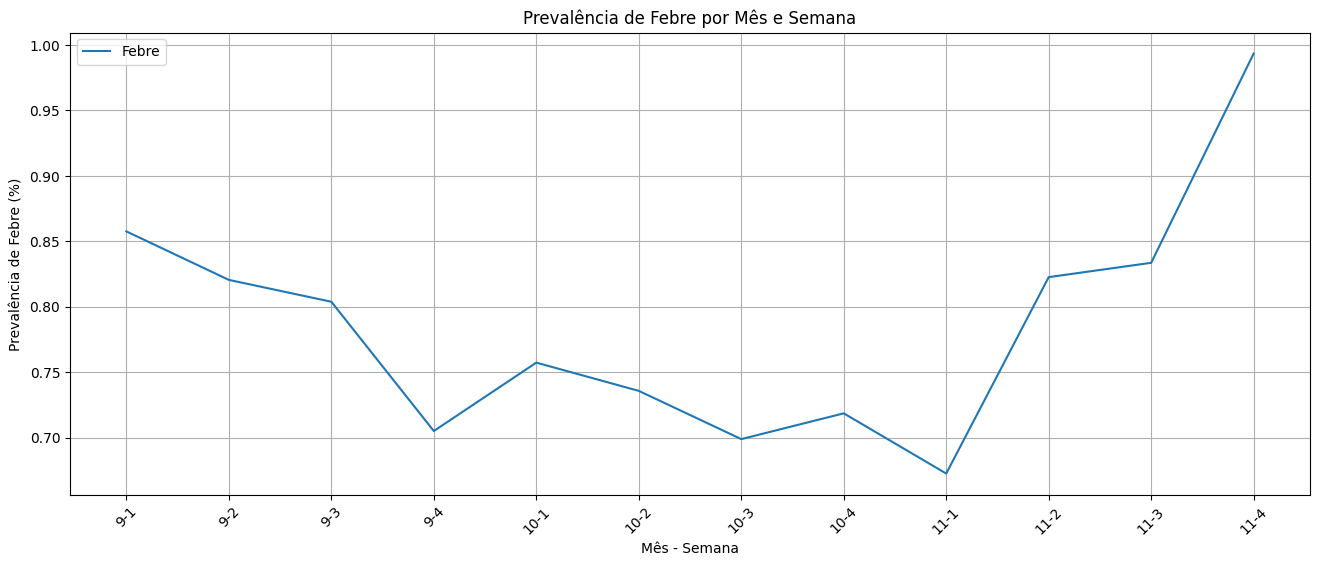

In [49]:
# Resetar o index para facilitar o plot
prevalencia_plot_data = prevalencia_febre_mes_semana.reset_index()

# Create labels for the x-axis
prevalencia_plot_data['label'] = prevalencia_plot_data['mes'].astype(str) + '-' + prevalencia_plot_data['semana'].astype(str)

# Plot the data
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_plot_data['label'], prevalencia_plot_data[0], label='Febre')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de Febre (%)")
plt.title("Prevalência de Febre por Mês e Semana")
plt.xticks(rotation=45)
plt.show()

In [50]:
# Análise da combinação de sintomas

# Nota 3: Considera-se que apresentou sintomas conjugados as pessoas que tiveram
# perda de cheiro ou sabor
# ou tosse, febre e dificuldade para respirar
# ou febre, tosse e dor no peito.

# Essa nota foi retirada do documento COVID-19 Data Brazil 2020

In [51]:
# Combinação 1: perda de olfato ou paladar
# Combinação 2: febre, tosse e deficuldade para respirar
# Combinação 3: febre, tosse e dor no peito
# Combinação 4: febre, tosse e perda de olfato ou paladar

combinacao_1 = (df_clinico[(df_clinico['perda_olfato_paladar'] == 1.0)].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100
combinacao_2 = (df_clinico[(df_clinico['febre'] == 1.0) & (df_clinico['tosse'] == 1.0) & (df_clinico['dificuldade_respirar'] == 1.0)].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100
combinacao_3 = (df_clinico[(df_clinico['febre'] == 1.0) & (df_clinico['tosse'] == 1.0) & (df_clinico['dor_peito'] == 1.0)].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100
combinacao_4 = (df_clinico[(df_clinico['febre'] == 1.0) & (df_clinico['tosse'] == 1.0) & (df_clinico['perda_olfato_paladar'] == 1.0)].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100

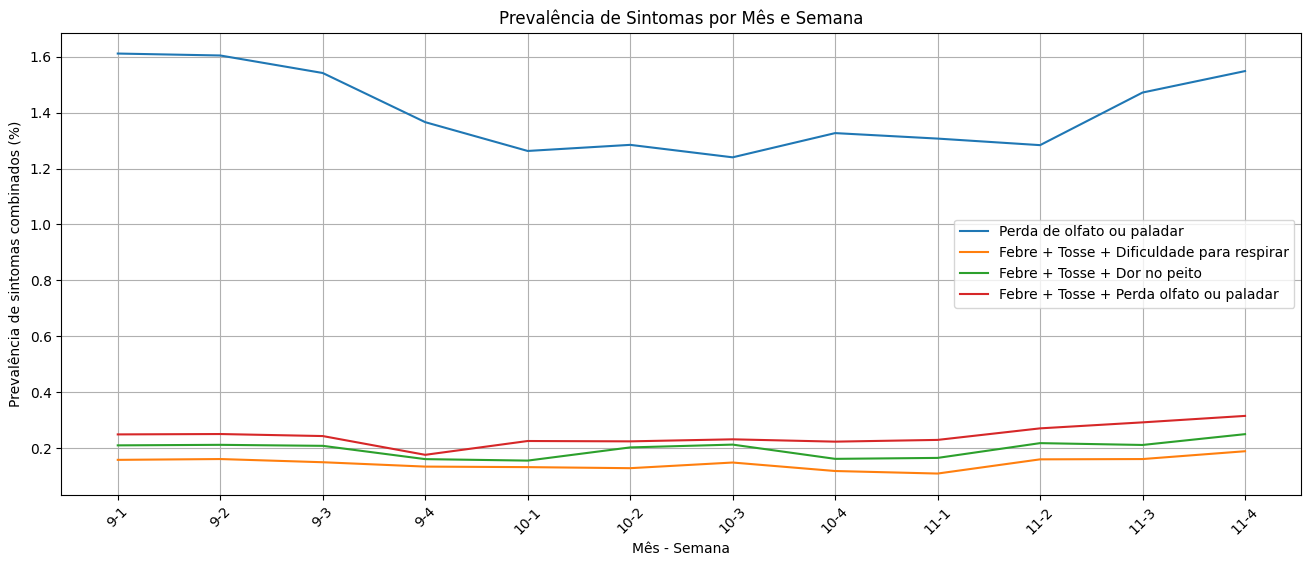

In [52]:
prevalencia_combincacao_1 = combinacao_1.reset_index()
prevalencia_combincacao_1['label'] = prevalencia_combincacao_1['mes'].astype(str) + '-' + prevalencia_combincacao_1['semana'].astype(str)

prevalencia_combinacao_2 = combinacao_2.reset_index()
prevalencia_combinacao_2['label'] = prevalencia_combinacao_2['mes'].astype(str) + '-' + prevalencia_combinacao_2['semana'].astype(str)

prevalencia_combincacao_3 = combinacao_3.reset_index()
prevalencia_combincacao_3['label'] = prevalencia_combincacao_3['mes'].astype(str) + '-' + prevalencia_combincacao_3['semana'].astype(str)

prevalencia_combinacao_4 = combinacao_4.reset_index()
prevalencia_combinacao_4['label'] = prevalencia_combinacao_4['mes'].astype(str) + '-' + prevalencia_combinacao_4['semana'].astype(str)

plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_combincacao_1['label'], prevalencia_combincacao_1[0], label='Perda de olfato ou paladar')
plt.plot(prevalencia_combinacao_2['label'], prevalencia_combinacao_2[0], label='Febre + Tosse + Dificuldade para respirar')
plt.plot(prevalencia_combincacao_3['label'], prevalencia_combincacao_3[0], label='Febre + Tosse + Dor no peito')
plt.plot(prevalencia_combinacao_4['label'], prevalencia_combinacao_4[0], label='Febre + Tosse + Perda olfato ou paladar')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de sintomas combinados (%)")
plt.title("Prevalência de Sintomas por Mês e Semana")
plt.xticks(rotation=45)
plt.show()


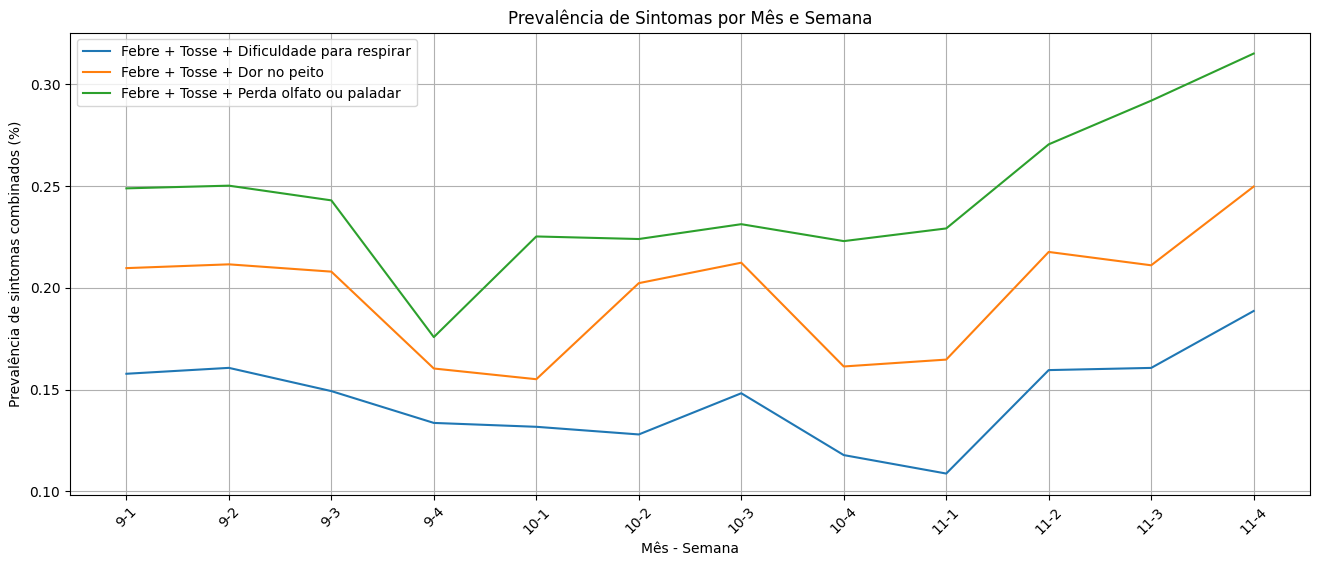

In [53]:
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_combinacao_2['label'], prevalencia_combinacao_2[0], label='Febre + Tosse + Dificuldade para respirar')
plt.plot(prevalencia_combincacao_3['label'], prevalencia_combincacao_3[0], label='Febre + Tosse + Dor no peito')
plt.plot(prevalencia_combinacao_4['label'], prevalencia_combinacao_4[0], label='Febre + Tosse + Perda olfato ou paladar')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de sintomas combinados (%)")
plt.title("Prevalência de Sintomas por Mês e Semana")
plt.xticks(rotation=45)
plt.show()